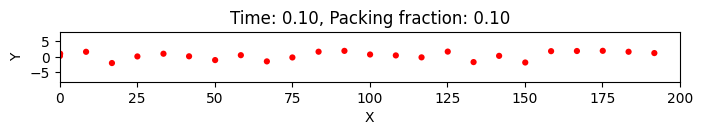

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a
v = 1.0

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.ones(N) * v
vy = np.zeros(N)

t_max = 100

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, L)
ax.set_ylim(-2 * w, 2 * w)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
vehicle_patches = []
dt = 0.10

def animate(frame):
    global x, y, vx, vy, vehicle_patches, dt

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    f_ij_y[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + v + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not vehicle_patches:
        vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in vehicle_patches:
            ax.add_patch(patch)
    else:
        for i, patch in enumerate(vehicle_patches):
            patch.center = (x[i], y[i])

    ax.set_title(f'Time: {dt:.2f}, Packing fraction: {packing_fraction:.2f}')
    return vehicle_patches

ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit=True)
plt.show()


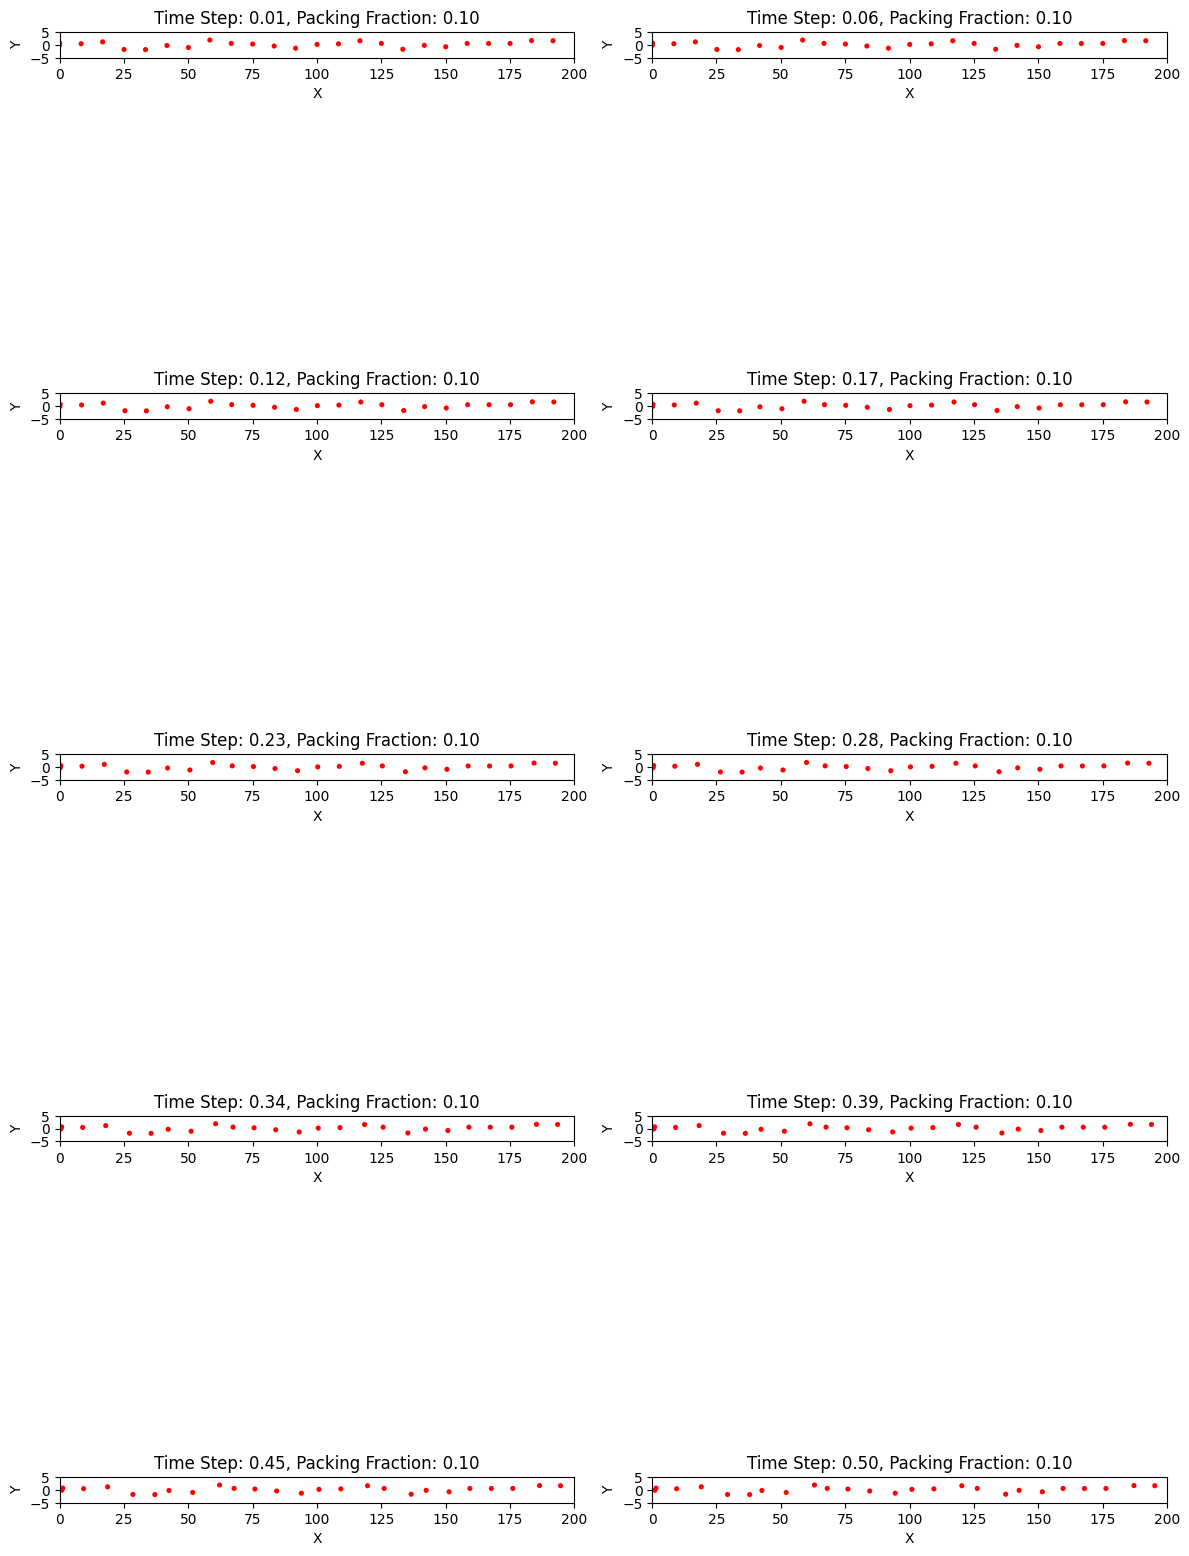

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a
v = 1.0

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.ones(N) * v
vy = np.zeros(N)

t_max = 100
frames = 100

fig, axs = plt.subplots(5, 2, figsize=(12, 20))
axs = axs.ravel()

patches_dict = {}

def animate(frame, ax, dt):
    global x, y, vx, vy, patches_dict

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    f_ij_y[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + v + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if ax not in patches_dict:
        patches_dict[ax] = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in patches_dict[ax]:
            ax.add_patch(patch)
    else:
        for i, patch in enumerate(patches_dict[ax]):
            patch.center = (x[i], y[i])

    ax.set_title(f'Time Step: {dt:.2f}, Packing Fraction: {packing_fraction:.2f}')
    return patches_dict[ax]

for ax, dt in zip(axs, np.linspace(0.01, 0.5, 10)):
    ax.set_xlim(0, L)
    ax.set_ylim(-5 , 5 )
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')
    ani = FuncAnimation(fig, animate, frames=frames, fargs=(ax, dt), interval=10, blit=True)

plt.tight_layout()
plt.show()


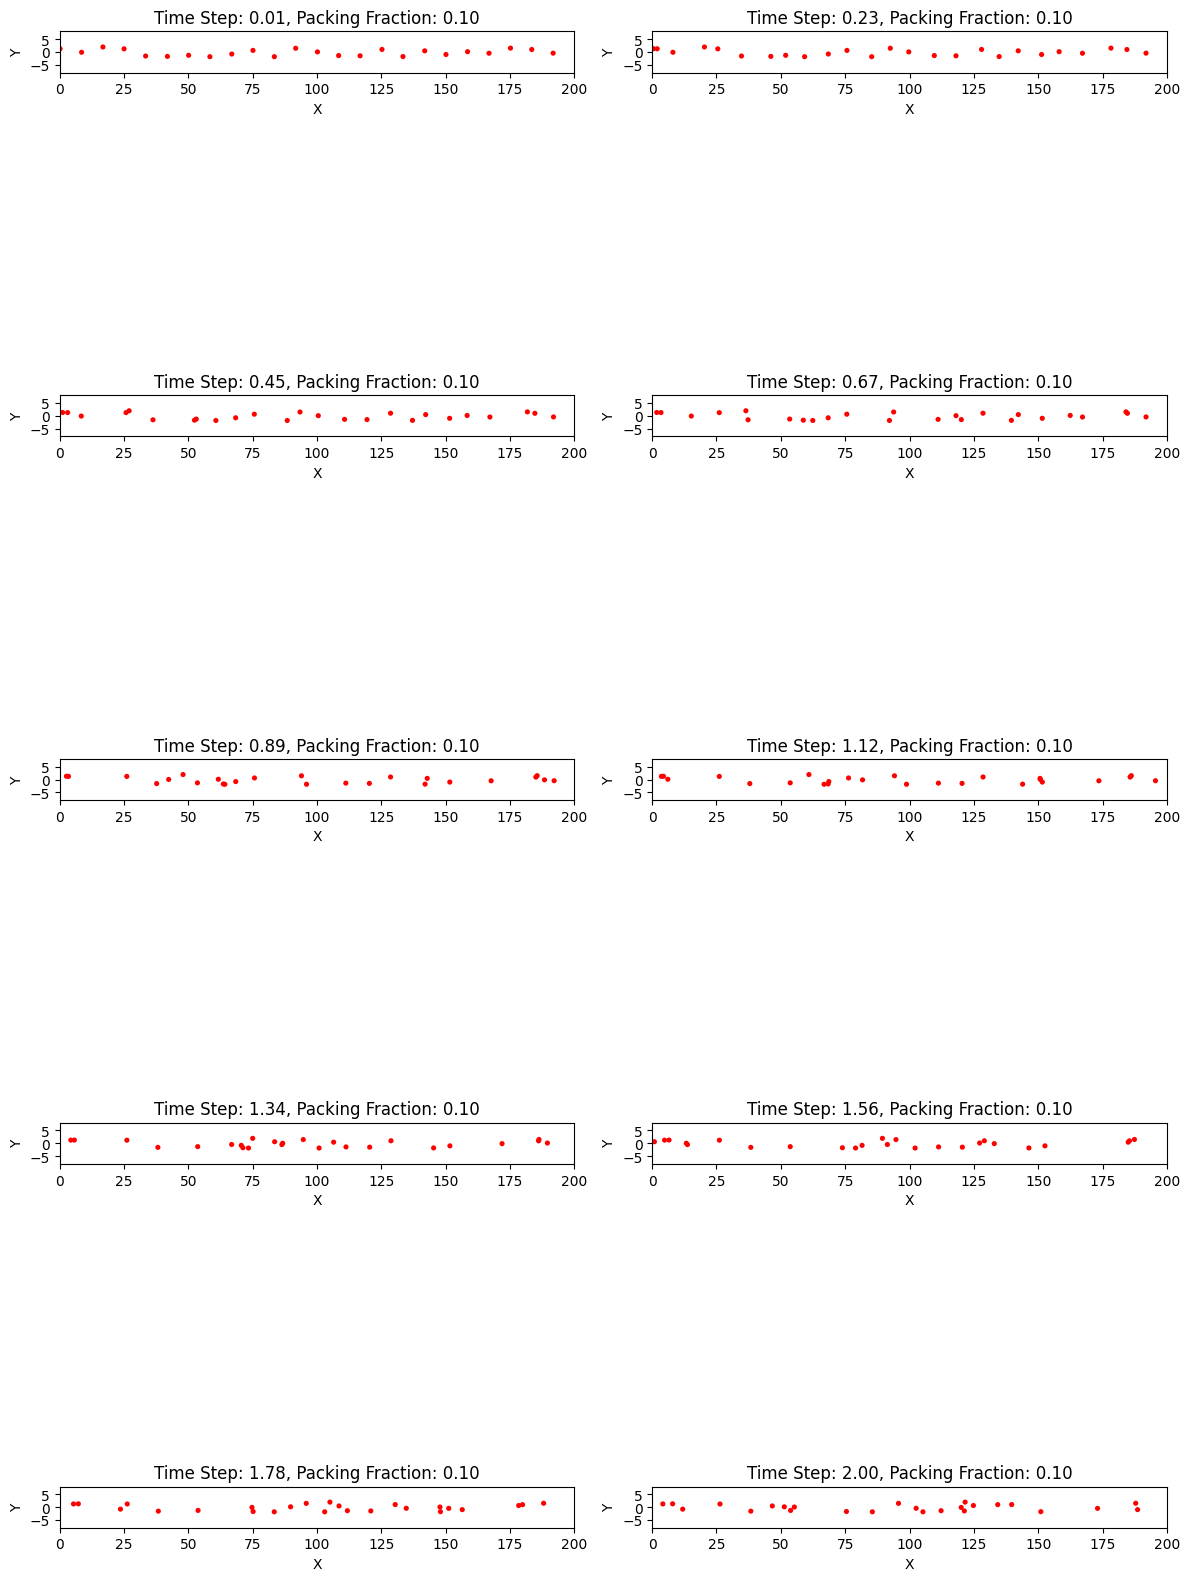

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a
v = 1.0

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.ones(N) * v
vy = np.zeros(N)

t_max = 100
frames = 100

fig, axs = plt.subplots(5, 2, figsize=(12, 20))
axs = axs.ravel()


patches_dict = {}

def animate(frame, ax, dt):
    global x, y, vx, vy, patches_dict

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    f_ij_y[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + v + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if ax not in patches_dict:
        patches_dict[ax] = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in patches_dict[ax]:
            ax.add_patch(patch)
    else:
        for i, patch in enumerate(patches_dict[ax]):
            patch.center = (x[i], y[i])

    ax.set_title(f'Time Step: {dt:.2f}, Packing Fraction: {packing_fraction:.2f}')
    return patches_dict[ax]

for ax, dt in zip(axs, np.linspace(0.01, 2, 10)):
    ax.set_xlim(0, L)
    ax.set_ylim(-2 * w, 2 * w)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')
    ani = FuncAnimation(fig, animate, frames=frames, fargs=(ax, dt), interval=10, blit=True)

plt.tight_layout()
plt.show()


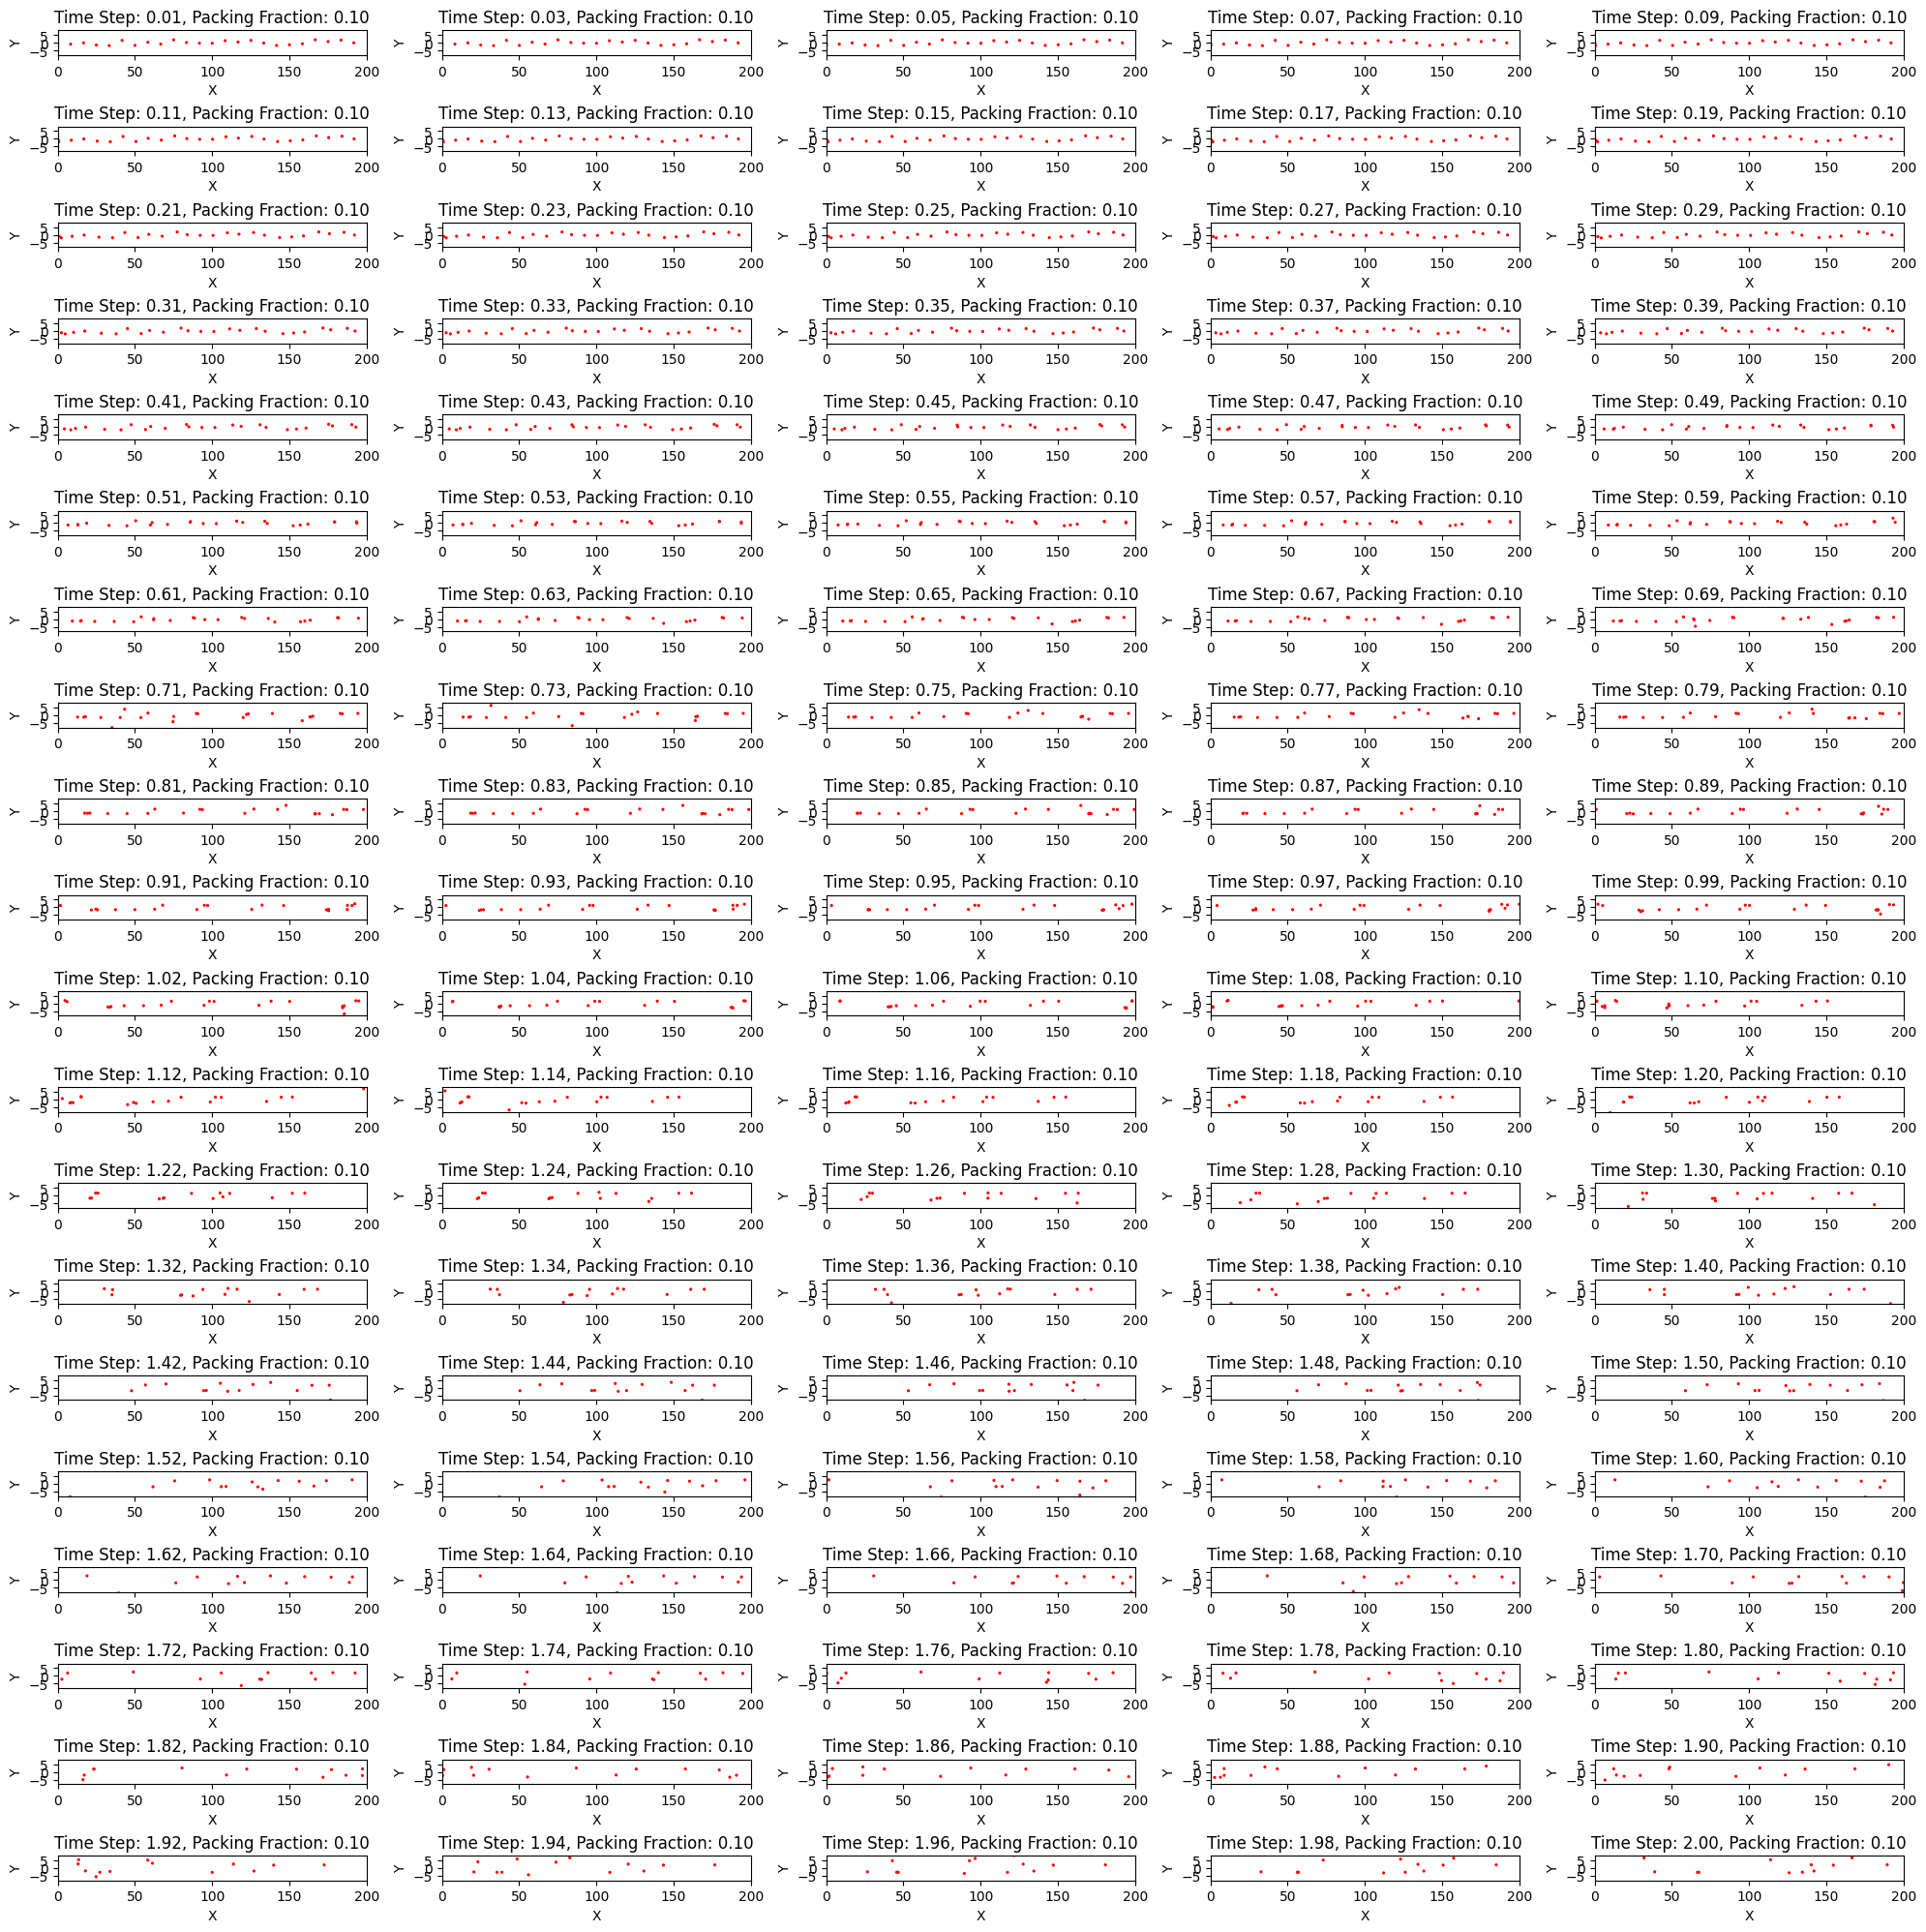

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a
v = 1.0

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.ones(N) * v
vy = np.zeros(N)

t_max = 100
frames = 100

fig, axs = plt.subplots(20, 5, figsize=(20, 20))
axs = axs.ravel()

def animate(frame, ax, dt):
    global x, y, vx, vy

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm
                    f_ij_y[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[1] / r_ij_norm

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + v + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not hasattr(ax, 'vehicle_patches'):
        ax.vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in ax.vehicle_patches:
            ax.add_patch(patch)
    else:
        for i, patch in enumerate(ax.vehicle_patches):
            patch.center = (x[i], y[i])

    ax.set_title(f'Time Step: {dt:.2f}, Packing Fraction: {packing_fraction:.2f}')
    return ax.vehicle_patches

for ax, dt in zip(axs, np.linspace(0.01, 2, 100)):
    ax.set_xlim(0, L)
    ax.set_ylim(-2 * w, 2 * w)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')
    ani = FuncAnimation(fig, animate, frames=frames, fargs=(ax, dt), interval=10, blit=True)

plt.tight_layout()
plt.show()

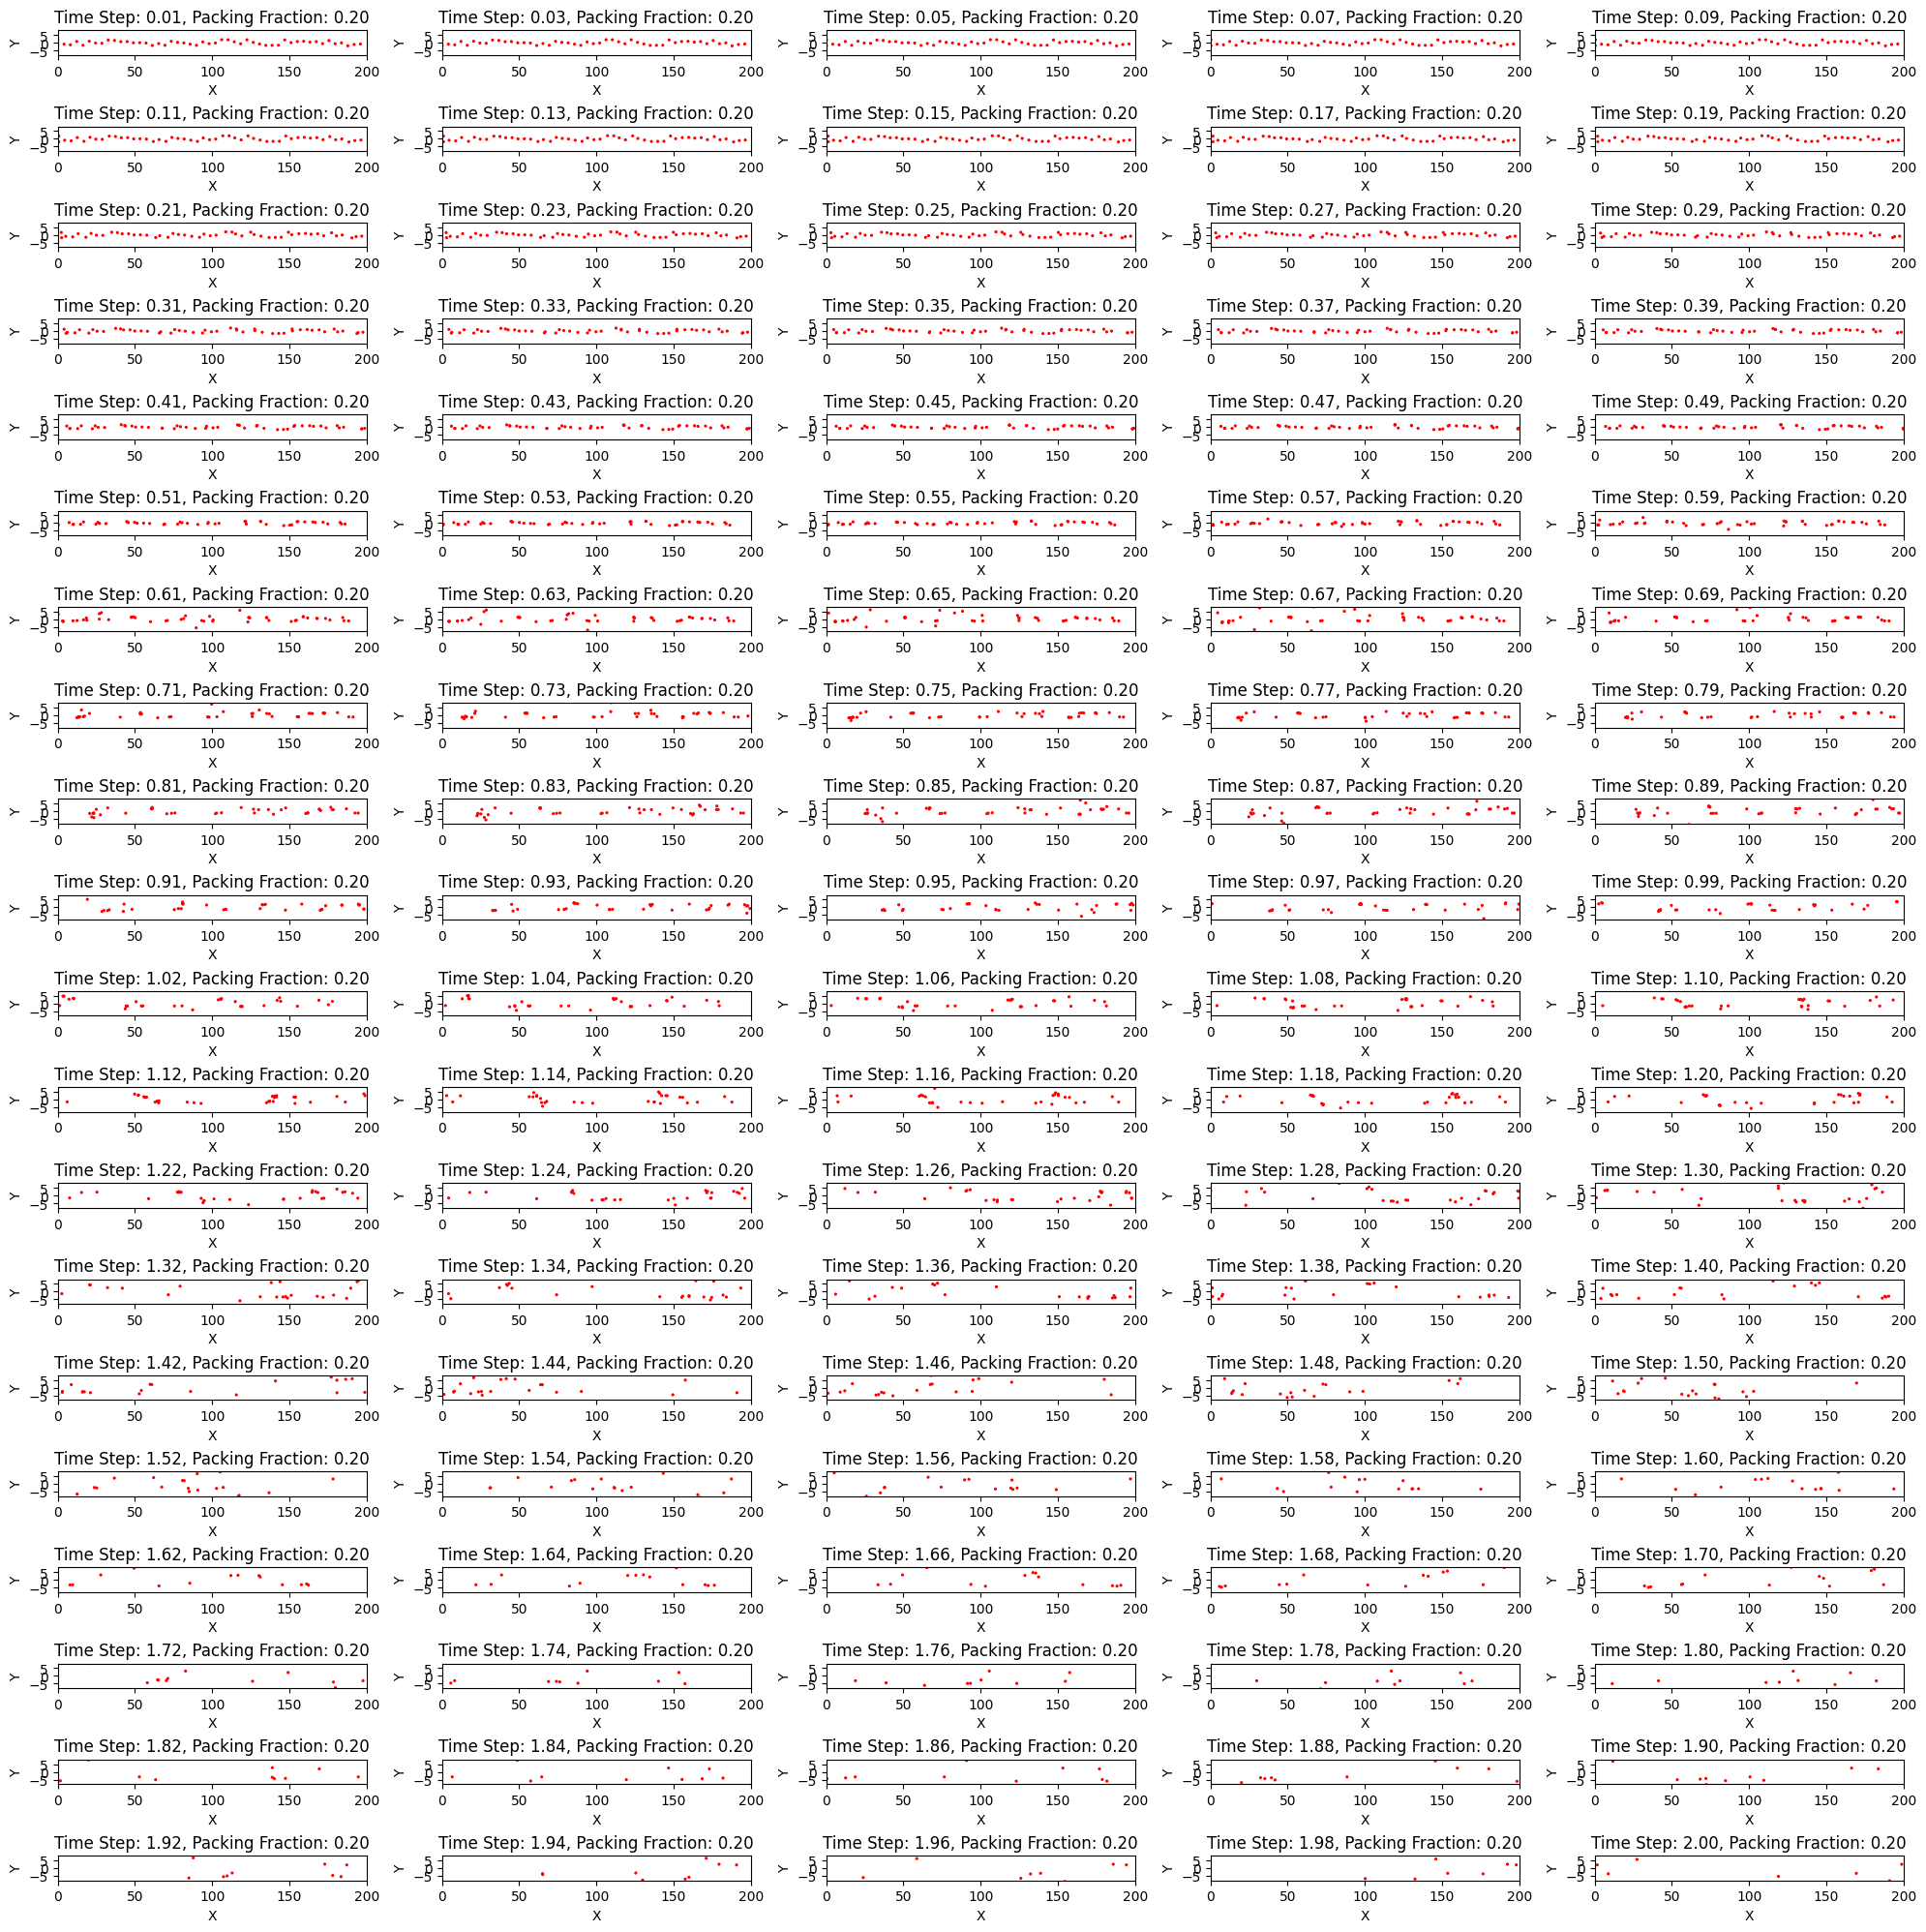

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 50
a = 1.0
w = 4 * a
L = 200 * a
v = 1.0

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.ones(N) * v
vy = np.zeros(N)

t_max = 100
frames = 100

fig, axs = plt.subplots(20, 5, figsize=(20, 20))
axs = axs.ravel()

def animate(frame, ax, dt):
    global x, y, vx, vy

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm
                    f_ij_y[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[1] / r_ij_norm

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + v + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not hasattr(ax, 'vehicle_patches'):
        ax.vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in ax.vehicle_patches:
            ax.add_patch(patch)
    else:
        for i, patch in enumerate(ax.vehicle_patches):
            patch.center = (x[i], y[i])

    ax.set_title(f'Time Step: {dt:.2f}, Packing Fraction: {packing_fraction:.2f}')
    return ax.vehicle_patches

for ax, dt in zip(axs, np.linspace(0.01, 2, 100)):
    ax.set_xlim(0, L)
    ax.set_ylim(-2 * w, 2 * w)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')
    ani = FuncAnimation(fig, animate, frames=frames, fargs=(ax, dt), interval=10, blit=True)

plt.tight_layout()
plt.show()

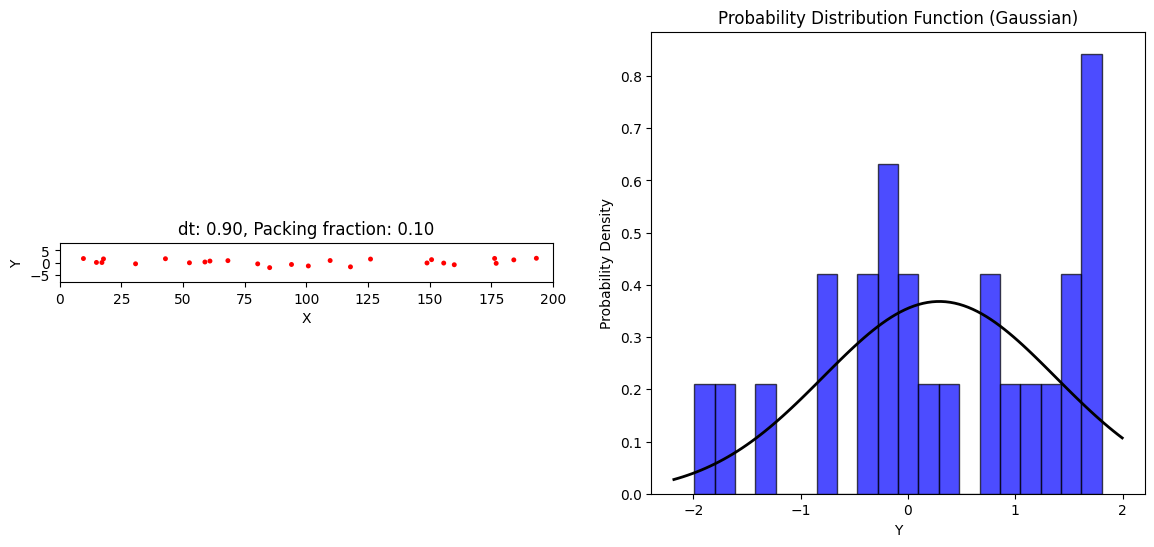

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a
v = 1.0

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.ones(N) * v
vy = np.zeros(N)

t_max = 100
frames = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.set_xlim(0, L)
ax1.set_ylim(-2 * w, 2 * w)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect('equal')
vehicle_patches = []
dt = 0.9

def animate(frame):
    global x, y, vx, vy, vehicle_patches, dt

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    y_data = []

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    f_ij_y[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

        y_data.append(y[i])

    ax_vals = f_ij_x + v + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not vehicle_patches:
        vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in vehicle_patches:
            ax1.add_patch(patch)
    else:
        for i, patch in enumerate(vehicle_patches):
            patch.center = (x[i], y[i])

    ax1.set_title(f'dt: {dt:.2f}, Packing fraction: {packing_fraction:.2f}')

    ax2.clear()
    mu, std = np.mean(y_data), np.std(y_data)
    ax2.hist(y_data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
    xmin, xmax = ax2.get_xlim()
    x_gaussian = np.linspace(xmin, xmax, 100)
    p = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-(x_gaussian - mu)**2 / (2 * std**2))
    line, = ax2.plot(x_gaussian, p, 'k', linewidth=2)
    ax2.set_title('Probability Distribution Function (Gaussian)')
    ax2.set_xlabel('Y')
    ax2.set_ylabel('Probability Density')

    return vehicle_patches + [line]

ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit=True)
plt.show()


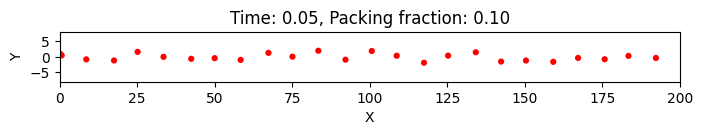

[5.95661951 2.40273633 8.44886929 1.59999556 1.42992305 7.15477606
 0.02846295 0.53524984 6.72756515 0.87105057 1.11118157 5.1302579
 6.8598372  3.49384895 8.61452956 2.70939465 8.92911527 7.26482238
 4.04968868 8.8066452  5.01779619 7.60067038 1.39071265 5.98441448
 1.88791192]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a
v_max = 10

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.random.uniform(0, v_max, N)
vy = np.zeros(N)

t_max = 100
frames = 100

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, L)
ax.set_ylim(-2 * w, 2 * w)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
vehicle_patches = []
dt = 0.05

def animate(frame):
    global x, y, vx, vy, vehicle_patches, dt

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    f_ij_y[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + vx + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not vehicle_patches:
        vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in vehicle_patches:
            ax.add_patch(patch)
    else:
        for i, patch in enumerate(vehicle_patches):
            patch.center = (x[i], y[i])

    ax.set_title(f'Time: {dt:.2f}, Packing fraction: {packing_fraction:.2f}')
    return vehicle_patches

ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit=True)
plt.show()
print(vx)


[ 7.90542845  3.2116966   4.93568281  5.71373006 10.48671999 10.34158064
  9.74584025  4.30927663 10.8190166   7.3212201   4.84882861  4.25884936
  5.64101045  8.37836568  1.7711715   1.912843    8.1334783   3.14961277
  9.6316677  10.4988238   8.517376    5.29429929  6.22832301  7.83435748
  8.43167868]


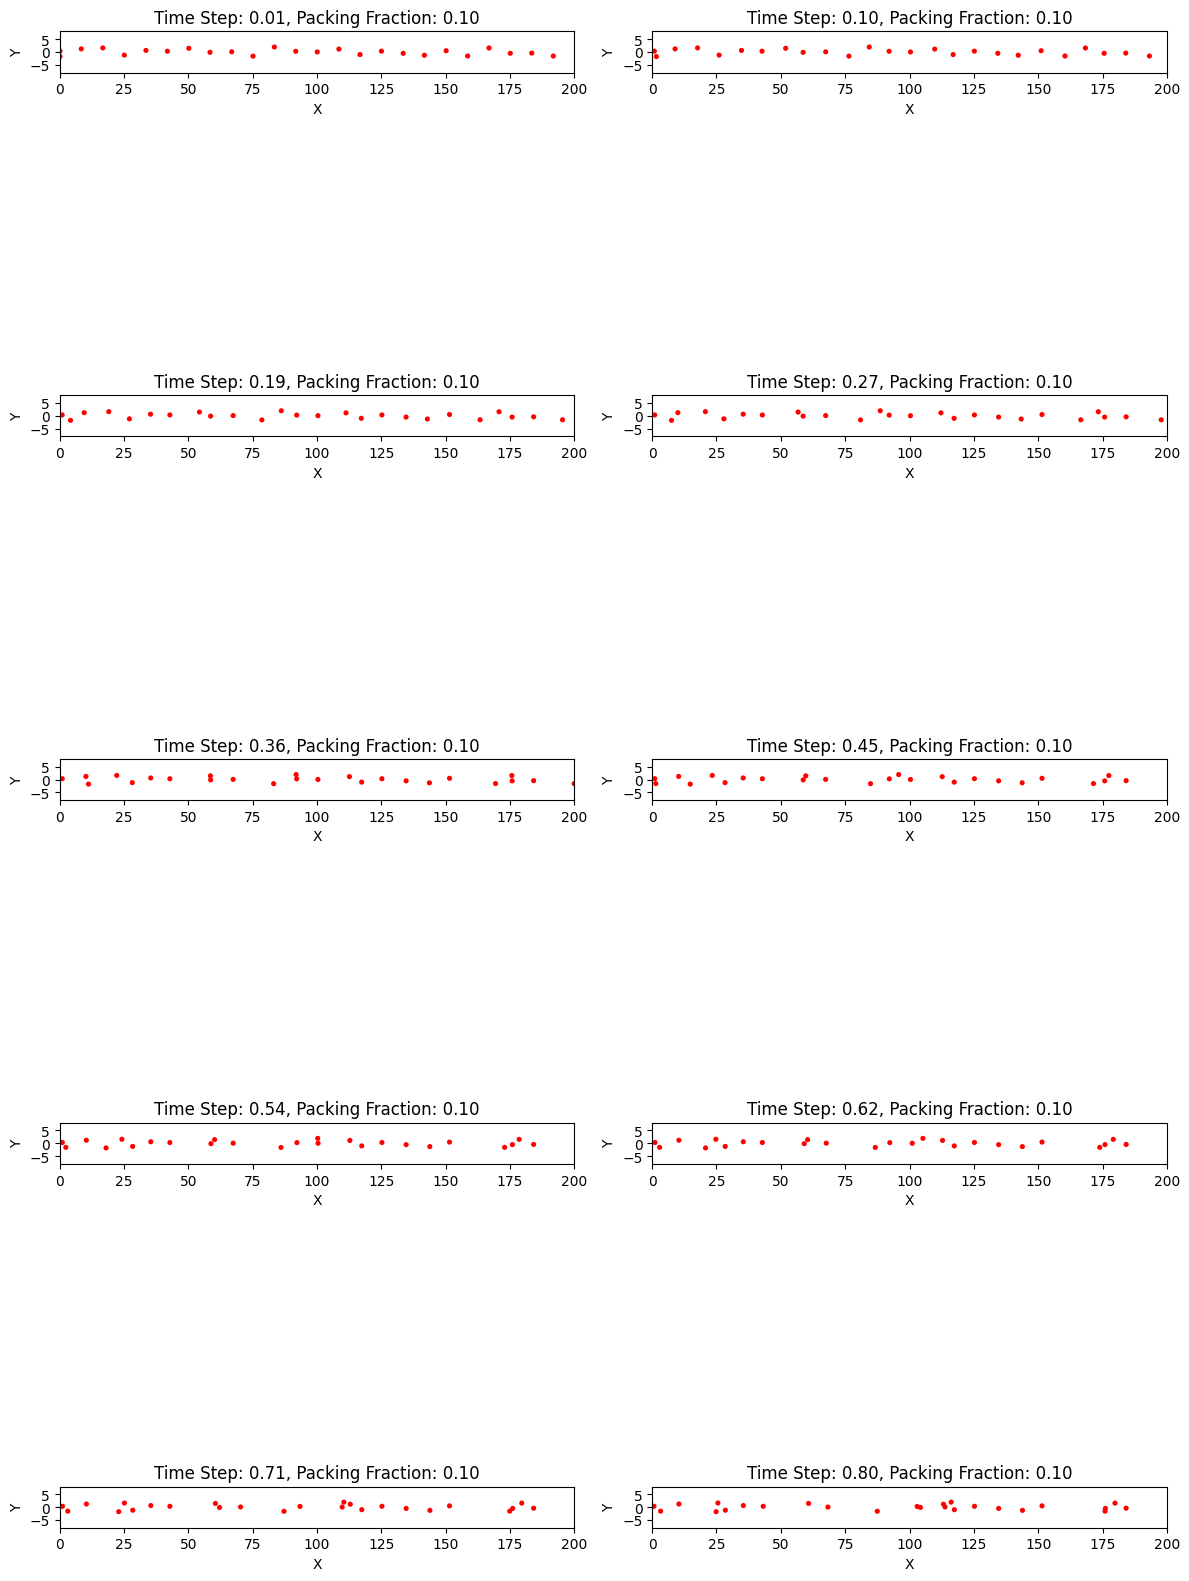

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.random.uniform(1, v_max + 1, N)
vy = np.zeros(N)
print(vx)

t_max = 100
frames = 100

fig, axs = plt.subplots(5, 2, figsize=(12, 20))
axs = axs.ravel()

patches_dict = {}

def animate(frame, ax, dt):
    global x, y, vx, vy, patches_dict

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    f_ij_y[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + vx + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if ax not in patches_dict:
        patches_dict[ax] = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in patches_dict[ax]:
            ax.add_patch(patch)
    else:
        for i, patch in enumerate(patches_dict[ax]):
            patch.center = (x[i], y[i])

    ax.set_title(f'Time Step: {dt:.2f}, Packing Fraction: {packing_fraction:.2f}')
    return patches_dict[ax]

for ax, dt in zip(axs, np.linspace(0.01, 0.8, 10)):
    ax.set_xlim(0, L)
    ax.set_ylim(-2 * w, 2 * w)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')
    ani = FuncAnimation(fig, animate, frames=frames, fargs=(ax, dt), interval=10, blit=True)

plt.tight_layout()
plt.show()


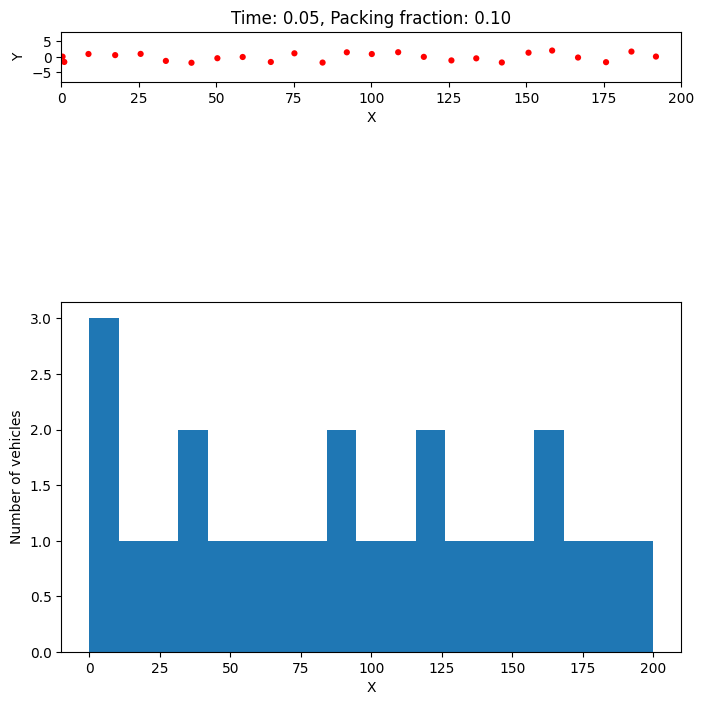

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a
v_max = 10

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.random.uniform(0, v_max, N)
vy = np.zeros(N)

t_max = 100
frames = 100

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
ax[0].set_xlim(0, L)
ax[0].set_ylim(-2 * w, 2 * w)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_aspect('equal')
vehicle_patches = []
dt = 0.05

def animate(frame):
    global x, y, vx, vy, vehicle_patches, dt

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    f_ij_y[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + vx + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not vehicle_patches:
        vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in vehicle_patches:
            ax[0].add_patch(patch)
    else:
        for i, patch in enumerate(vehicle_patches):
            patch.center = (x[i], y[i])

    ax[0].set_title(f'Time: {dt:.2f}, Packing fraction: {packing_fraction:.2f}')

    ax[1].cla()
    ax[1].hist(x, bins=np.linspace(0, L, 20))
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('Number of vehicles')

    return vehicle_patches

ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit=True)
plt.show()


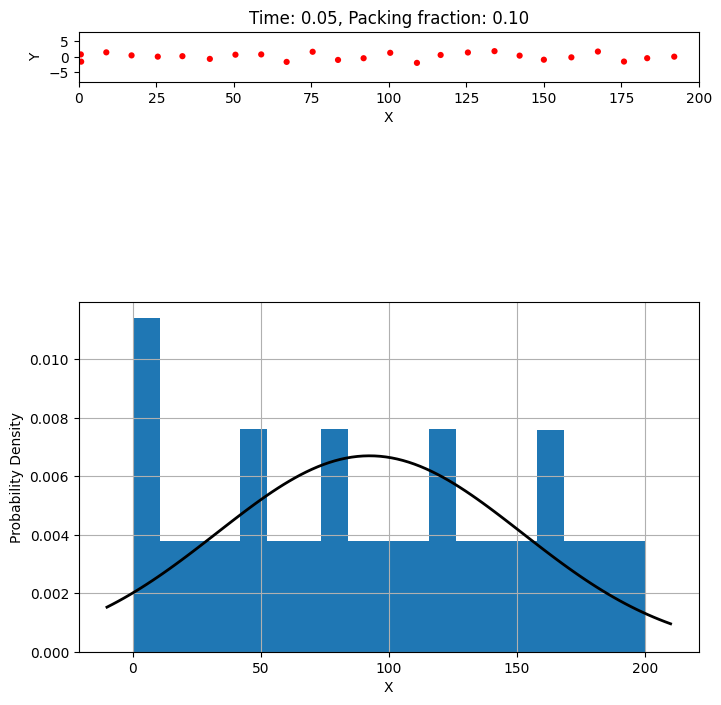

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a
v_max = 10

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.random.uniform(0, v_max, N)
vy = np.zeros(N)

t_max = 100
frames = 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
ax1.set_xlim(0, L)
ax1.set_ylim(-2 * w, 2 * w)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect('equal')
vehicle_patches = []
dt = 0.05

def animate(frame):
    global x, y, vx, vy, vehicle_patches, dt

    ax_vals = np.zeros(N)
    ay_vals = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    ax_vals[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    ay_vals[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        ay_vals[i] += -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        ax_vals[i] += -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not vehicle_patches:
        vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in vehicle_patches:
            ax1.add_patch(patch)
    else:
        for i, patch in enumerate(vehicle_patches):
            patch.center = (x[i], y[i])

    ax1.set_title(f'Time: {dt:.2f}, Packing fraction: {packing_fraction:.2f}')

    ax2.cla()
    ax2.hist(x, bins=np.linspace(0, L, 20), density=True)
    mu, std = np.mean(x), np.std(x)
    xmin, xmax = ax2.get_xlim()
    x_hist = np.linspace(xmin, xmax, 100)
    p = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-(x_hist - mu)**2 / (2 * std**2))
    ax2.plot(x_hist, p, 'k', linewidth=2)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Probability Density')
    ax2.grid(True)

    return vehicle_patches

ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit=True)
plt.show()


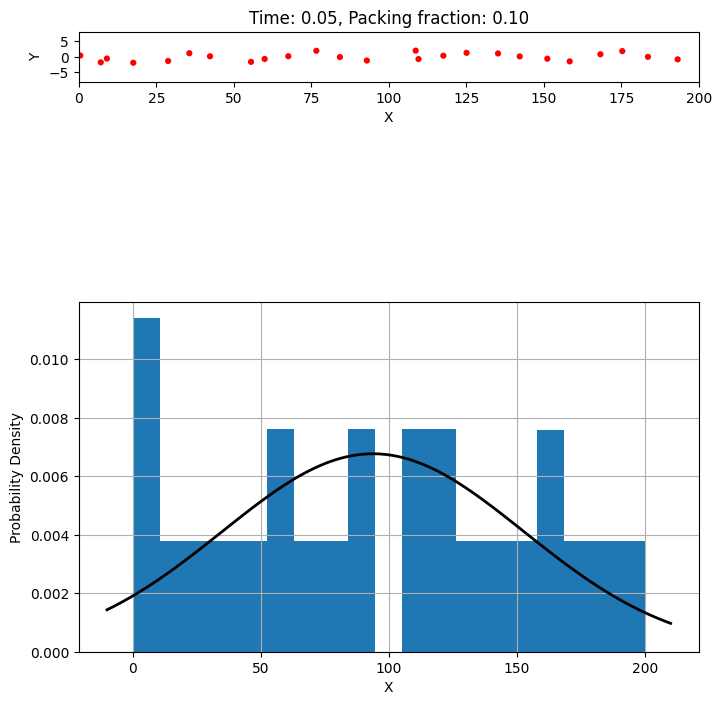

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 25
a = 1.0
w = 4 * a
L = 200 * a
v_max = 10

sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.random.uniform(0, v_max, N)
vy = np.zeros(N)

t_max = 100
frames = 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
ax1.set_xlim(0, L)
ax1.set_ylim(-2 * w, 2 * w)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect('equal')
vehicle_patches = []
dt = 0.05

def animate(frame):
    global x, y, vx, vy, vehicle_patches, dt

    ax_vals = np.zeros(N)
    ay_vals = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    ax_vals[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    ay_vals[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        ay_vals[i] += -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        ax_vals[i] += -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not vehicle_patches:
        vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in vehicle_patches:
            ax1.add_patch(patch)
    else:
        for i, patch in enumerate(vehicle_patches):
            patch.center = (x[i], y[i])

    ax1.set_title(f'Time: {dt:.2f}, Packing fraction: {packing_fraction:.2f}')

    ax2.cla()
    ax2.hist(x, bins=np.linspace(0, L, 20), density=True)
    mu, std = np.mean(x), np.std(x)
    xmin, xmax = ax2.get_xlim()
    x_hist = np.linspace(xmin, xmax, 100)
    p = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-(x_hist - mu)**2 / (2 * std**2))
    ax2.plot(x_hist, p, 'k', linewidth=2)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Probability Density')
    ax2.grid(True)

    return vehicle_patches

ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit=True)
ani.save('animation_with_border.mp4', writer='ffmpeg', dpi=300)
plt.savefig('animation_with_border.pdf', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()


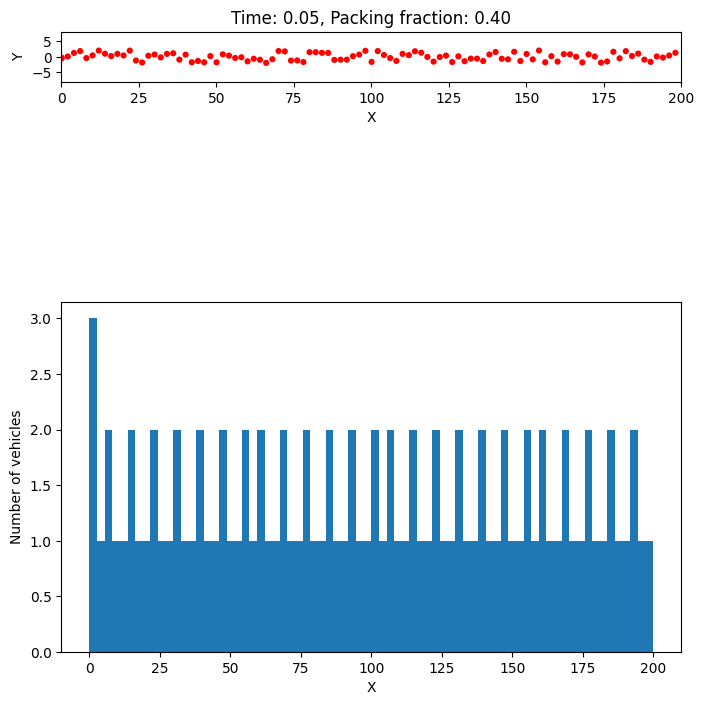

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 101
a = 1.0
w = 4 * a
L = 200 * a
v0 = 1


sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.ones(N)*v0
vy = np.zeros(N)

t_max = 100
frames = 100

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
ax[0].set_xlim(0, L)
ax[0].set_ylim(-2 * w, 2 * w)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_aspect('equal')
vehicle_patches = []
dt = 0.05
def animate(frame):
    global x, y, vx, vy, vehicle_patches, dt

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    f_ij_y[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + vx + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
   # vx += ax_vals * dt
   # vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not vehicle_patches:
        vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in vehicle_patches:
            ax[0].add_patch(patch)
    else:
        for i, patch in enumerate(vehicle_patches):
            patch.center = (x[i], y[i])

    ax[0].set_title(f'Time: {dt:.2f}, Packing fraction: {packing_fraction:.2f}')

    ax[1].cla()
    ax[1].hist(x, bins=np.linspace(0, L, 75))
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('Number of vehicles')

    return vehicle_patches

ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit=True)
plt.show()
print(vx)

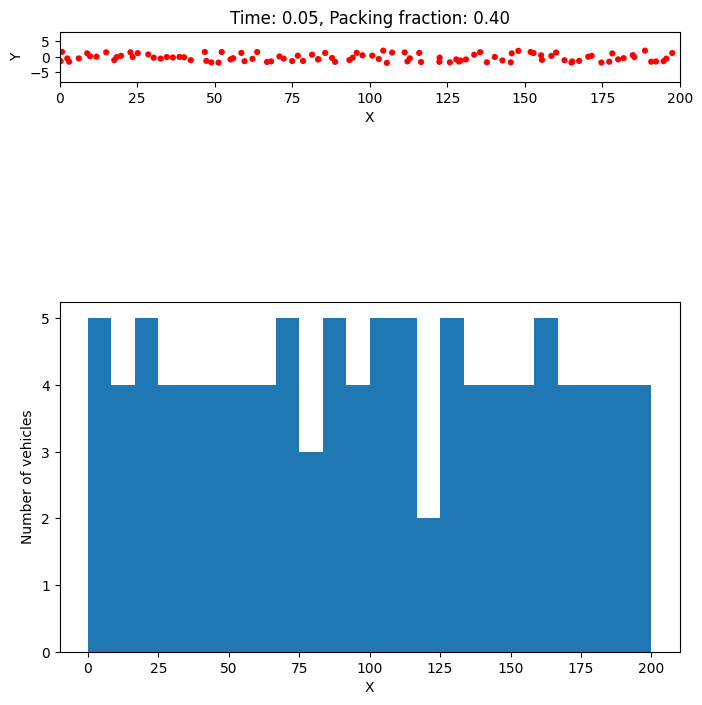

[  3.10209777   4.12443182  -9.27464438   1.4780179    8.59076969
  -1.56865229  -0.78203623   9.8702568   15.47017567   3.37753463
  -1.67968659   8.27566332  -3.62766255  -7.70391139   5.58503036
   3.0368598    5.17888622   4.76958258   4.60329685   5.35719132
   1.2092292    2.91557577  27.88907539  29.06674194  -6.64838701
  12.47767168   2.79250828  10.72375053  -0.29311656   6.12408381
  -3.44386578   1.96890993  -2.67819196   8.84767659   1.81482919
   7.49523764   2.3725867    9.79095209   7.33748469   5.1629423
  13.10891498  13.0408368   -5.26607535  -3.37285765  -1.14243368
 -11.29031072  14.10885897   4.85427446  -1.48758716  -2.63270741
   7.48784175   8.90010077   3.82132293  -4.49229184  -7.3642307
  12.8181328    8.7098787  -17.71830428  -0.08391487 -14.07997687
  24.54904493   5.04929098  18.80962416  18.40700715   8.03122817
  -6.04511321  -8.8694463   -2.54606373  -3.62766487  -1.74729856
   3.00040595   8.03396425  15.24256753  -1.60897049  -0.12614148
  18.8921581

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 101
a = 1.0
w = 4 * a
L = 200 * a
v0 = 5
sig_v0 = 8


sigma = 1.0
l_1 = 2.0
A_w_n = 1.0
A_w_t = 1.0
l_w = 1.0
lambda_ij = 1.0

x = np.linspace(0, L, N)
y = np.random.uniform(-w/2, w/2, N)
vx = np.random.normal(v0, sig_v0, N)
vy = np.zeros(N)

t_max = 100
frames = 100

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
ax[0].set_xlim(0, L)
ax[0].set_ylim(-2 * w, 2 * w)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_aspect('equal')
vehicle_patches = []
dt = 0.05

def animate(frame):
    global x, y, vx, vy, vehicle_patches, dt

    f_ij_x = np.zeros(N)
    f_ij_y = np.zeros(N)
    f_w_x_t = np.zeros(N)
    f_w_y_n = np.zeros(N)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = np.array([x[j] - x[i], y[j] - y[i]])
                r_ij_norm = np.linalg.norm(r_ij)
                if r_ij_norm > 0 and r_ij[0] >= 0:
                    f_ij_x[i] += sigma * np.exp(-r_ij_norm / l_1) * r_ij[0] / r_ij_norm

                    dx = x[j] - x[i]
                    dy = y[j] - y[i]
                    vx_diff = vx[j] - vx[i]
                    vy_diff = vy[j] - vy[i]
                    f_ij_y[i] += lambda_ij * np.cross(r_ij, np.array([0, 0, 1]))[2]

        f_w_y_n[i] = -A_w_n * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vy[i]
        f_w_x_t[i] = -A_w_t * np.exp(-(np.abs(y[i]) - w / 2) / l_w) * vx[i]

    ax_vals = f_ij_x + vx + f_w_x_t
    ay_vals = f_ij_y + f_w_y_n
    vx += ax_vals * dt
    vy += ay_vals * dt
    x += vx * dt
    y += vy * dt

    x = np.mod(x, L)

    packing_fraction = (N * np.pi * a**2) / (w * L)

    if not vehicle_patches:
        vehicle_patches = [plt.Circle((x[i], y[i]), a, fc='r') for i in range(N)]
        for patch in vehicle_patches:
            ax[0].add_patch(patch)
    else:
        for i, patch in enumerate(vehicle_patches):
            patch.center = (x[i], y[i])

    ax[0].set_title(f'Time: {dt:.2f}, Packing fraction: {packing_fraction:.2f}')

    ax[1].cla()
    ax[1].hist(x, bins=np.linspace(0, L, 25))
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('Number of vehicles')

    return vehicle_patches

ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit=True)
plt.show()
print(vx)